In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final_data.csv"
data=pd.read_csv(filepath)
data

,PatientID,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,condition
0,P043T01,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,0
1,P044T01,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,0
2,P050T01,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,0
3,P064T01,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,0
4,P065T01,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,1
...,...,...,...,...,...,...,...,...,...,...
73,P032T02,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,1
74,P042T02,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,0
75,P046T02,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,0
76,P069T02,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,1


In [7]:
data.drop(columns=['PatientID'],inplace=True)
data.insert(8,'max_temp',data.iloc[:,:-1].max(axis=1))
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,1
...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,1


In [8]:
data.insert(9,'min_temp',data.iloc[:,:-2].min(axis=1))
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,1
...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,1


In [10]:
data.insert(10,'temp_range',data['max_temp']-data['min_temp'])
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [11]:
data.to_csv(r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv",index=False)
print("File saved")

File saved


In [59]:
from sklearn.model_selection import train_test_split

X=data.drop(columns='condition')
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [60]:
len(y_train)

39

In [61]:
len(y_test)

39

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=1)

In [63]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [64]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f"Testing Accuracy:{accuracy:.2f}%")

Testing Accuracy:1.00%


In [65]:
y_pred=clf.predict(X_train)
accuracy=accuracy_score(y_pred,y_train)
print(f"Training accuracy:{accuracy:.2f}%")

Training accuracy:1.00%


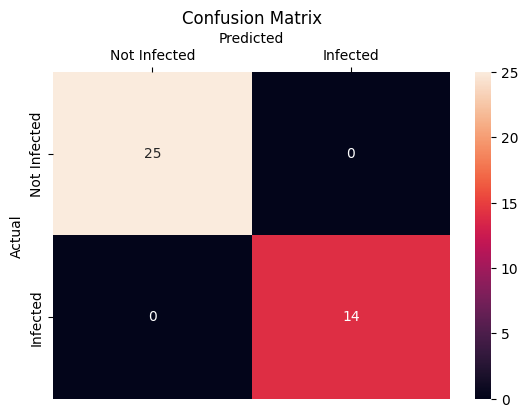

Accuracy: 100.000%
Precision: 100.000%
Sensitivity (Recall): 100.000%
F1-Score: 100.000%


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=clf.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [67]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



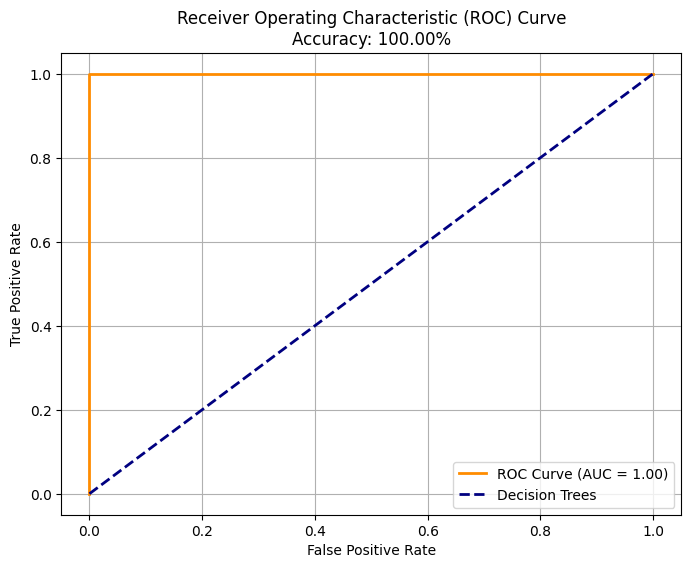

In [68]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = clf.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = clf.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Decision Trees')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Decision Trees with Grid Search CV

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 1.0
DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)


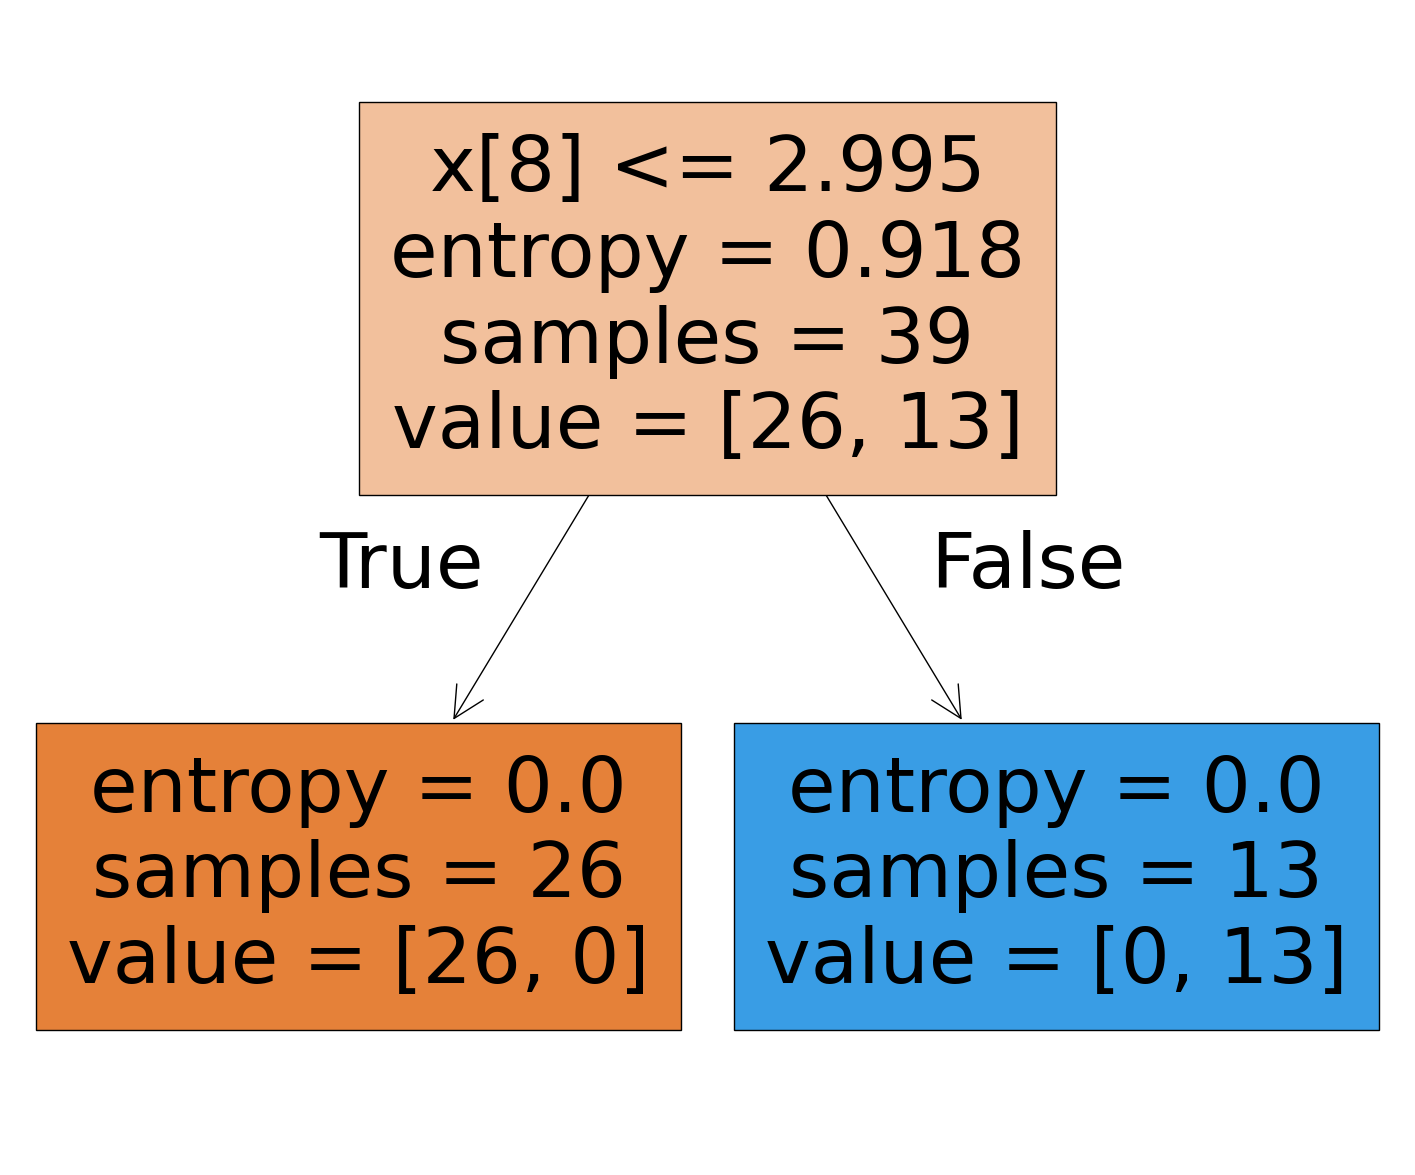

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True)
plt.show()

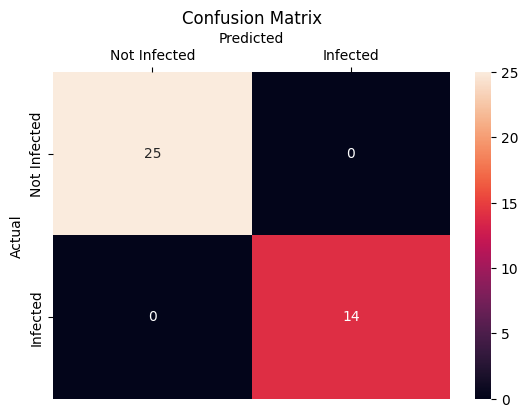

Accuracy: 100.000%
Precision: 100.000%
Sensitivity (Recall): 100.000%
F1-Score: 100.000%


In [71]:
actual=y_test
predicted=grid_search.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Extract values from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [72]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



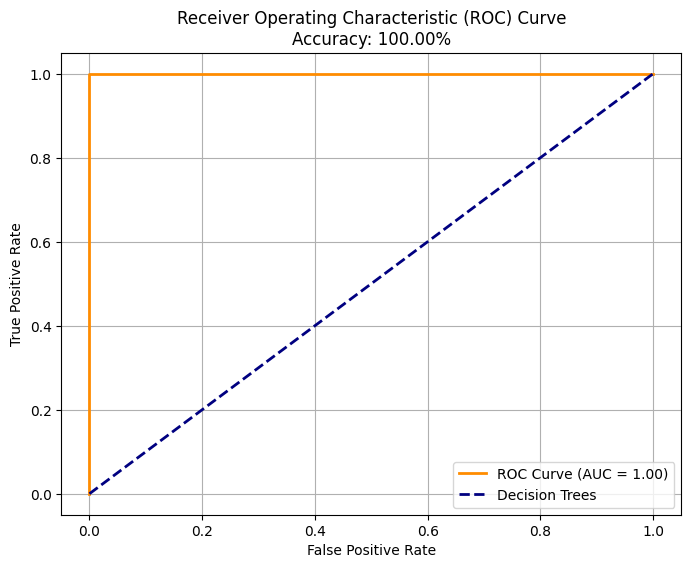

In [73]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = grid_search.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Decision Trees')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [74]:
import warnings
warnings.filterwarnings("ignore")
values=[[2.1,2.2,2.3,2.4,3.5,2.6,2.7,2.8,2.5,2.1,1.4]]
cond=grid_search.predict(values)
print(cond)

[0]


In [75]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=grid_search.predict(values)
print(cond)

[1]


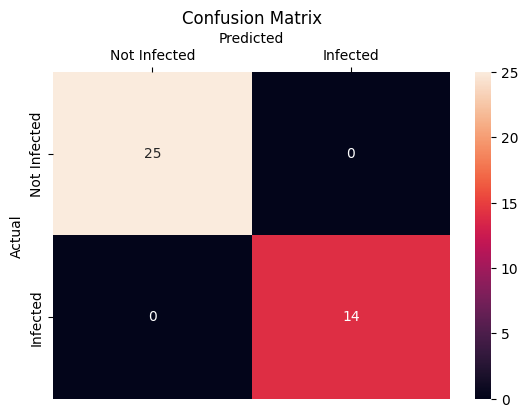

Accuracy: 100.000%
Precision: 100.000%
Sensitivity (Recall): 100.000%
F1-Score: 100.000%


In [76]:
actual=y_test
predicted=grid_search.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Extract values from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [77]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

